In [493]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import scipy.optimize

import minkowski_tools as mt

In [609]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

In [244]:
n = 10000
ps = np.arange(0.5, 1.55, 0.05)
ns = [n]*len(ps)
rs = mt.norm_kernel_2D(ps, 5/n)
mt.separate_simulations(ns, ps, rs, savename='test_func.txt')

n-10000, p-0.5, r-0.05477220097834299
Generated points.

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:103: RuntimeWarning: invalid value encountered in sqrt
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:104: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.55, r-0.04930153791496095
Generated points.

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:103: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)


Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.6000000000000001, r-0.045226095249907707
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.6500000000000001, r-0.04209065871728356
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.7000000000000002, r-0.03961491319486234
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.7500000000000002, r-0.03761802360384738
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.8000000000000003, r-0.03597839297223089
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.8500000000000003, r-0.03461169170392771
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving

True

In [371]:
all_runs = pd.read_csv('test_func.txt', header=None, delimiter=" - ", names=mt.headers)
all_runs.shape
all_runs.round({'p': 2})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
0,0.80,0.080450,2000,31.0,39.0,2.106931,2.262005,"[[1.0, 1.0], [0.9740970618984705, 0.9724339587...","[[1.0, 1.0], [0.9894497289342215, 0.9916729835...","[[1.0, 1.0], [0.9894497289342215, 0.9916729835...","[[1.0, 1.0], [0.9740970618984705, 0.9724339587..."
1,0.85,0.077394,2000,31.0,45.0,2.076668,2.177865,"[[1.0, 1.0], [0.9864179385118497, 0.9647771259...","[[1.0, 1.0], [0.9864179385118497, 0.9647771259...","[[1.0, 1.0], [0.9864179385118497, 0.9647771259...","[[1.0, 1.0], [0.9864179385118497, 0.9647771259..."
2,0.90,0.074814,2000,32.0,43.0,2.040722,2.112964,"[[1.0, 1.0], [0.9898748553026778, 0.9702677342...","[[1.0, 1.0], [0.9898748553026778, 0.9702677342...","[[1.0, 1.0], [0.9898748553026778, 0.9702677342...","[[1.0, 1.0], [0.9898748553026778, 0.9702677342..."
3,0.95,0.072610,2000,32.0,41.0,2.019957,2.043791,"[[1.0, 1.0], [0.9748584229893716, 0.9774815397...","[[1.0, 1.0], [0.9927737191769709, 0.9659217697...","[[1.0, 1.0], [0.9927737191769709, 0.9659217697...","[[1.0, 1.0], [0.9698888872040029, 0.9747698329..."
4,1.00,0.070711,2000,31.0,44.0,2.000000,2.000000,"[[1.0, 1.0], [0.9838402405808921, 0.9458584857...","[[1.0, 1.0], [0.9912684723671841, 0.9663231467...","[[1.0, 1.0], [0.9646208604668208, 0.9879830681...","[[1.0, 1.0], [0.9912684723671841, 0.9663231467..."
5,1.05,0.069059,2000,31.0,44.0,1.937246,1.957874,"[[1.0, 1.0], [0.9752704313457875, 0.9608644845...","[[1.0, 1.0], [0.9839472053593568, 0.9901561576...","[[1.0, 1.0], [0.9838714601616747, 0.9742340072...","[[1.0, 1.0], [0.978123873053921, 0.95756121503..."
6,1.10,0.067611,2000,32.0,44.0,1.882018,1.910695,"[[1.0, 1.0], [0.9783518548291524, 0.9800043007...","[[1.0, 1.0], [0.9783518548291524, 0.9800043007...","[[1.0, 1.0], [0.9783518548291524, 0.9800043007...","[[1.0, 1.0], [0.9825878129378194, 0.9612292920..."
7,1.15,0.066334,2000,31.0,39.0,1.832894,1.867719,"[[1.0, 1.0], [0.9674232512517247, 0.9793583354...","[[1.0, 1.0], [0.9805838031816996, 0.9912422412...","[[1.0, 1.0], [0.9762760141747377, 0.9537390297...","[[1.0, 1.0], [0.9470233106221041, 0.9945919711..."
8,0.80,0.080450,4000,29.0,44.0,2.062074,2.261350,"[[1.0, 1.0], [0.9653272781181138, 0.9823708126...","[[1.0, 1.0], [0.9876232607698674, 0.9988545050...","[[1.0, 1.0], [0.9263804648713456, 0.9995561751...","[[1.0, 1.0], [0.9793046664909343, 0.9808518107..."
9,0.85,0.077394,4000,30.0,41.0,2.051585,2.175985,"[[1.0, 1.0], [0.9811573620137561, 0.9632138705...","[[1.0, 1.0], [0.9924064718794291, 0.9549743909...","[[1.0, 1.0], [0.9924064718794291, 0.9549743909...","[[1.0, 1.0], [0.9585637631801798, 0.9746769058..."


In [378]:
n=4000
connected_runs = all_runs[all_runs['long_lengthBool'] > 0]
data = connected_runs[(connected_runs['n'] == n) & (connected_runs['r'] == mt.norm_kernel_2D(connected_runs['p'], 5/connected_runs['n']))]

print(data.shape)
data.head()

(62, 11)


,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
40,0.80,0.056887,4000,44.0,61.0,2.095930,2.282988,"[[1.0, 1.0], [0.9874935596965132, 0.9940186510...","[[1.0, 1.0], [0.9874935596965132, 0.9940186510...","[[1.0, 1.0], [0.9996034765495839, 0.9881304308...","[[1.0, 1.0], [0.9808809426200478, 0.9804994395..."
41,0.85,0.054726,4000,43.0,57.0,2.065468,2.169792,"[[1.0, 1.0], [0.9985070725213195, 0.9562967449...","[[1.0, 1.0], [0.9978290171352883, 0.9601653957...","[[1.0, 1.0], [0.9924480932173582, 0.9976790513...","[[1.0, 1.0], [0.9831999052940429, 0.9680588855..."
43,0.95,0.051343,4000,43.0,61.0,2.017360,2.048525,"[[1.0, 1.0], [0.9867459410969528, 0.9715240326...","[[1.0, 1.0], [0.9984480851627904, 0.9844130122...","[[1.0, 1.0], [0.9984480851627904, 0.9844130122...","[[1.0, 1.0], [0.9867459410969528, 0.9715240326..."
44,1.00,0.050000,4000,44.0,58.0,2.000000,2.000000,"[[1.0, 1.0], [0.9816189400588305, 0.9858510715...","[[1.0, 1.0], [0.9990688101395966, 0.9742705163...","[[1.0, 1.0], [0.9845986880262312, 0.9673815733...","[[1.0, 1.0], [0.9990688101395966, 0.9742705163..."
46,1.10,0.047808,4000,44.0,60.0,1.883386,1.907126,"[[1.0, 1.0], [0.978220397656843, 0.97541402502...","[[1.0, 1.0], [0.9670407063454397, 0.9900884319...","[[1.0, 1.0], [0.9670407063454397, 0.9900884319...","[[1.0, 1.0], [0.9670407063454397, 0.9900884319..."


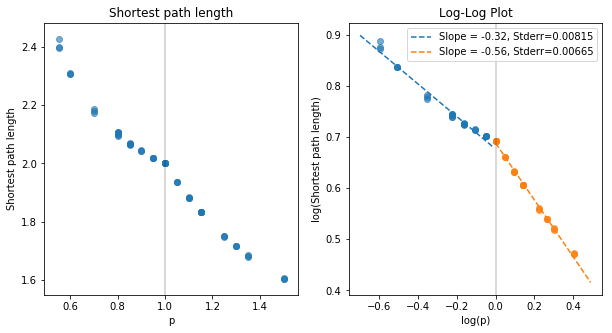

In [430]:
sub = data[data['p'] < 1]
sup = data[data['p'] > 1]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(data['p'], data['short_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Shortest path length', title='Shortest path length')

ax2.scatter(np.log(sub['p']), np.log(sub['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sub['p']), np.log(sub['short_length']))
subx = np.arange(-.7, 0, 0.01)
ax2.plot(subx, slope*subx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.scatter(np.log(sup['p']), np.log(sup['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sup['p']), np.log(sup['short_length']))
supx = np.arange(0, 0.5, 0.01)
ax2.plot(supx, slope*supx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Shortest path length)', title='Log-Log Plot')

ax2.legend()
# plt.savefig('img/Shortpathlength.pdf')

In [380]:
ps = [p for p in data['p']]
angs = [mt.path_angles(mt.points_str(path)) for path in data['short_pathBoolpoints']]

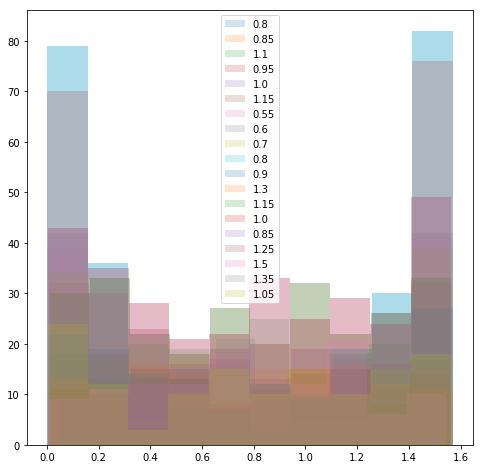

In [392]:
fig, ax = plt.subplots(figsize=(8, 8))

hist_data = {np.round(p, 2):[] for p in ps}

for ang, p in zip(angs, ps):
    hist_data[np.round(p, 2)].extend(ang)
    
[ax.hist(hist_data[np.round(p, 2)], label=np.round(p, 2), alpha=0.2) for p in set(ps)]

ax.legend()

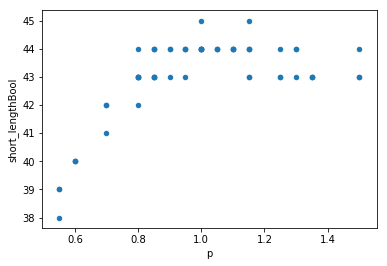

In [408]:
data.plot.scatter(x='p', y='short_lengthBool')

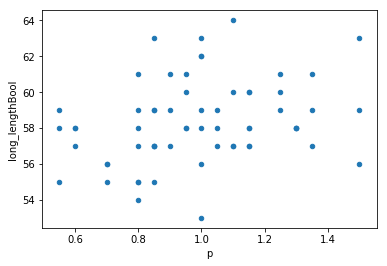

In [409]:
data.plot.scatter(x='p', y='long_lengthBool')

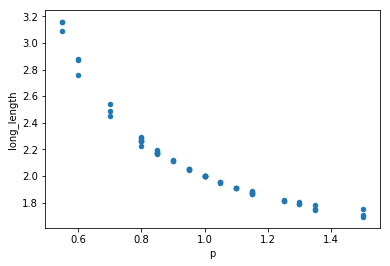

In [414]:
data.plot.scatter(x='p', y='long_length')

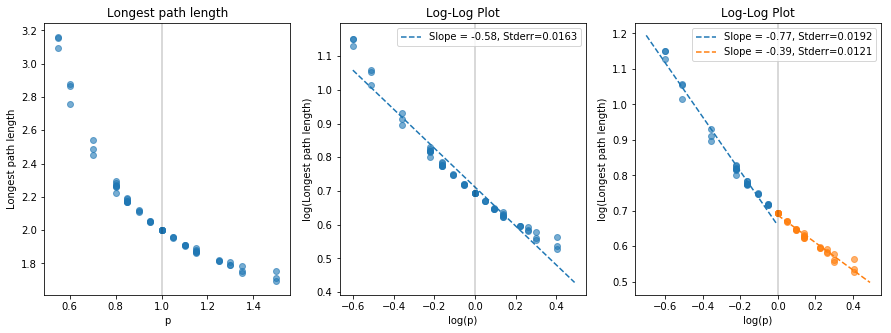

In [429]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(15, 5))

ax1.scatter(data['p'], data['long_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Longest path length', title='Longest path length')
ax2.scatter(np.log(data['p']), np.log(data['long_length']), label='', alpha=0.6)

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(data['p']), np.log(data['long_length']))
x = np.arange(-0.6, 0.5, 0.01)
ax2.plot(x, slope*x+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Longest path length)', title='Log-Log Plot')

ax2.legend()

sub = data[data['p'] < 1]
sup = data[data['p'] > 1]

ax3.scatter(np.log(sub['p']), np.log(sub['long_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sub['p']), np.log(sub['long_length']))
subx = np.arange(-.7, 0, 0.01)
ax3.plot(subx, slope*subx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax3.scatter(np.log(sup['p']), np.log(sup['long_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sup['p']), np.log(sup['long_length']))
supx = np.arange(0, 0.5, 0.01)
ax3.plot(supx, slope*supx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax3.axvline(x=0, alpha=0.2, c='k')
ax3.set(xlabel='log(p)', ylabel='log(Longest path length)', title='Log-Log Plot')

ax3.legend()

# plt.savefig('img/Longpathlength.pdf')

In [514]:
all_dim_data = pd.read_csv('dimensionrun.txt', header=None, delimiter=" - ", names=mt.headers)
dim_data = all_dim_data[all_dim_data['p'] == 0.8]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


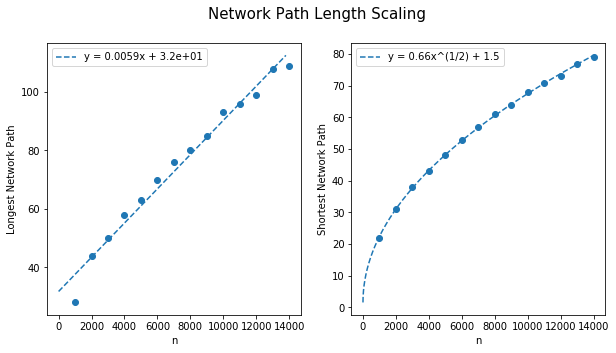

In [544]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(dim_data['n'], dim_data['long_lengthBool'], label='')

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(dim_data['n'], dim_data['long_lengthBool'])
x = np.arange(0, 14000, 200)
ax1.plot(x, slope*x+intercept, label=f'y = {slope:.2}x + {intercept:.2}', ls='--')

ax1.set(xlabel='n', ylabel='Longest Network Path') #title='Longest Network Path', 
ax1.legend()

ax2.scatter(dim_data['n'], dim_data['short_lengthBool'], label='')
x = np.arange(0, 14000)

def func(x, a, b):
    return a*np.sqrt(x) + b

popt, pcov = sp.optimize.curve_fit(func, dim_data['n'], dim_data['short_lengthBool'])
ax2.plot(x, func(x, *popt), ls='--',  label=f'y = {popt[0]:.2}x^(1/2) + {popt[1]:.2}')

ax2.set(xlabel='n', ylabel='Shortest Network Path') #title='Shortest Network Path', 
ax2.legend()

fig.suptitle('Network Path Length Scaling', size=15);
# plt.savefig('img/lengthscaling.pdf')

In [599]:
all_newrun = pd.read_csv('newrun.txt', header=None, delimiter=" - ", names=mt.headers)
newrun = all_newrun[all_newrun['long_lengthBool']>0]
newrun.head()
# plt.scatter(dim_data['n'], dim_data['long_lengthBool'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
0,0.50,0.054772,10000,59.0,90.0,2.522375,3.419910,"[[1.0, 1.0], [0.9959100200969712, 0.9913712408...","[[1.0, 1.0], [0.9959100200969712, 0.9913712408...","[[1.0, 1.0], [0.9959100200969712, 0.9913712408...","[[1.0, 1.0], [0.997752137772247, 0.97702574480..."
1,0.51,0.053536,10000,58.0,93.0,2.467962,3.385560,"[[1.0, 1.0], [0.9810491084132017, 0.9975864150...","[[1.0, 1.0], [0.993911805175879, 0.99985531905...","[[1.0, 1.0], [0.9947805727317309, 0.9967993985...","[[1.0, 1.0], [0.9810491084132017, 0.9975864150..."
2,0.52,0.052376,10000,59.0,84.0,2.438077,3.226024,"[[1.0, 1.0], [0.9952190212467383, 0.9737342596...","[[1.0, 1.0], [0.9959219551173405, 0.9984344370...","[[1.0, 1.0], [0.9993666545167119, 0.9863377320...","[[1.0, 1.0], [0.9938968980314278, 0.9766142885..."
4,0.54,0.050265,10000,58.0,86.0,2.384950,3.039199,"[[1.0, 1.0], [0.9870767172489514, 0.9942968675...","[[1.0, 1.0], [0.9903117713395266, 0.9956557956...","[[1.0, 1.0], [0.9980012488620479, 0.9963635136...","[[1.0, 1.0], [0.989958332189476, 0.98268395773..."
5,0.55,0.049302,10000,60.0,90.0,2.378848,3.031984,"[[1.0, 1.0], [0.9930141643989682, 0.9896845045...","[[1.0, 1.0], [0.9973163988931635, 0.9857392694...","[[1.0, 1.0], [0.9791534337942849, 0.9974901763...","[[1.0, 1.0], [0.9973163988931635, 0.9857392694..."


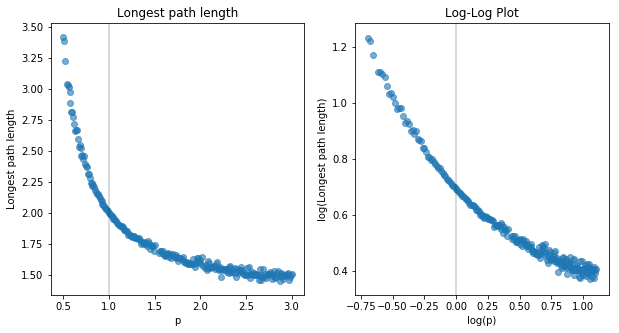

In [600]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(newrun['p'], newrun['long_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Longest path length', title='Longest path length')
ax2.scatter(np.log(newrun['p']), np.log(newrun['long_length']), label='', alpha=0.6)

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Longest path length)', title='Log-Log Plot');

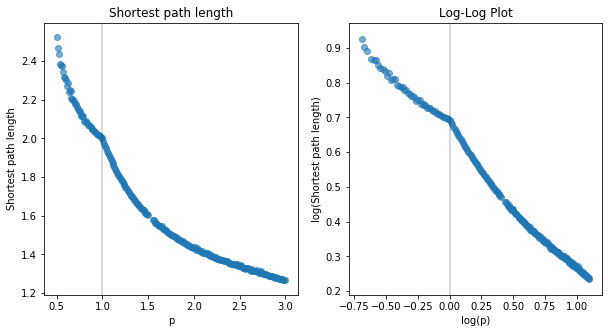

In [601]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(newrun['p'], newrun['short_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Shortest path length', title='Shortest path length')
ax2.scatter(np.log(newrun['p']), np.log(newrun['short_length']), label='', alpha=0.6)

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Shortest path length)', title='Log-Log Plot');

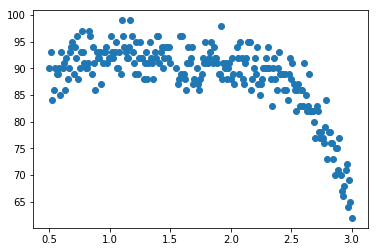

In [602]:
plt.scatter(newrun['p'], newrun['long_lengthBool']);

''

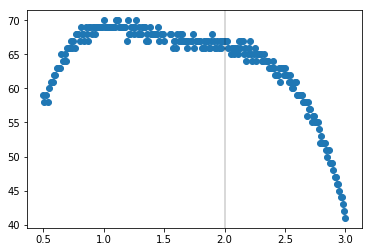

In [603]:
plt.scatter(newrun['p'], newrun['short_lengthBool'])
plt.axvline(x=2, alpha=0.2, c='k')
;

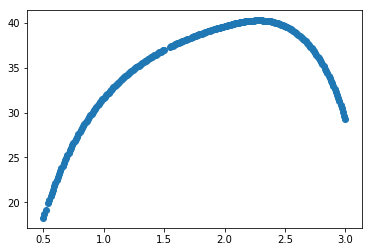

In [604]:
plt.scatter(newrun['p'], 1/(newrun['r']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt


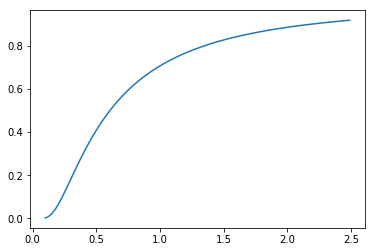

In [629]:
plt.plot(np.arange(0, 2.5, 0.01),  1/norm_kernel_2D(np.arange(0, 2.5, 0.01), 1))

In [594]:
np.arange(2.1, 5.01, 0.1).shape

(30,)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


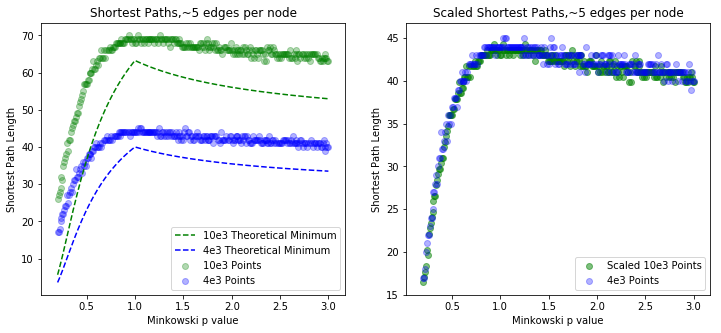

In [713]:
allbigrun = pd.read_csv('10000bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
bigrun = allbigrun[allbigrun['long_length'] > 0]

all4k = pd.read_csv('4000bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
k4 = all4k[all4k['long_length'] > 0].sort_values('p', axis=0)

theoretical10k = np.concatenate(((2/bigrun[bigrun['p'] < 1]['r']), (2**(1/bigrun[bigrun['p'] >= 1]['p'])/bigrun[bigrun['p'] >= 1]['r'])))
theoretical4k = np.concatenate(((2/k4[k4['p'] < 1]['r']), (2**(1/k4[k4['p'] >= 1]['p'])/k4[k4['p'] >= 1]['r'])))



fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(bigrun['p'], bigrun['short_lengthBool'], label='10e3 Points', alpha=0.3, c='g')
ax1.scatter(k4['p'], k4['short_lengthBool'], label='4e3 Points', alpha=0.3, c='b')
ax1.plot(bigrun['p'], theoretical10k, 'g--', label='10e3 Theoretical Minimum')
ax1.plot(k4['p'], theoretical4k, 'b--', label='4e3 Theoretical Minimum')
ax1.legend()
ax1.set(title='Shortest Paths,~5 edges per node', xlabel='Minkowski p value', ylabel='Shortest Path Length');

ax2.scatter(bigrun['p'], bigrun['short_lengthBool']/np.sqrt(2.5), label='Scaled 10e3 Points', alpha=0.5, c='g')
ax2.scatter(k4['p'], k4['short_lengthBool'], label='4e3 Points', alpha=0.3, c='b')
ax2.set(title='Scaled Shortest Paths,~5 edges per node', xlabel='Minkowski p value', ylabel='Shortest Path Length');
ax2.legend()

plt.savefig('img/n_scale_short.pdf')

# less = bigrun[bigrun['p'] < 1]
# more = bigrun[bigrun['p'] >= 1]
# theoretical = np.concatenate(((2/less['r']), (2**(1/more['p'])/more['r'])))

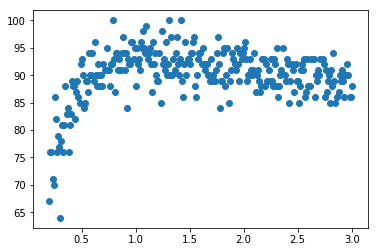

In [685]:
plt.scatter(bigrun['p'], bigrun['long_lengthBool'])

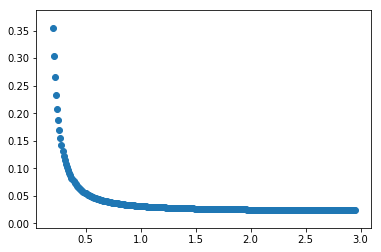

In [645]:
plt.scatter(bigrun['p'], bigrun['r'])

In [ ]:
#want to keep r as constant and see what happens (change n)

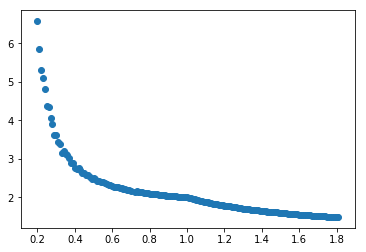

In [619]:
plt.scatter(bigrun['p'], bigrun['short_length'])

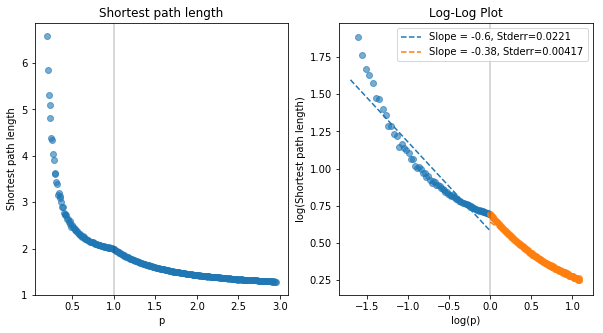

In [646]:
sub = bigrun[bigrun['p'] < 1]
sup = bigrun[bigrun['p'] > 1]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(bigrun['p'], bigrun['short_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Shortest path length', title='Shortest path length')

ax2.scatter(np.log(sub['p']), np.log(sub['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sub['p']), np.log(sub['short_length']))
subx = np.arange(-1.7, 0, 0.01)
ax2.plot(subx, slope*subx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.scatter(np.log(sup['p']), np.log(sup['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sup['p']), np.log(sup['short_length']))
supx = np.arange(0, 0.5, 0.01)
ax2.plot(supx, slope*supx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Shortest path length)', title='Log-Log Plot')

ax2.legend()
plt.savefig('img/10000Shortpathlength.pdf')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if _

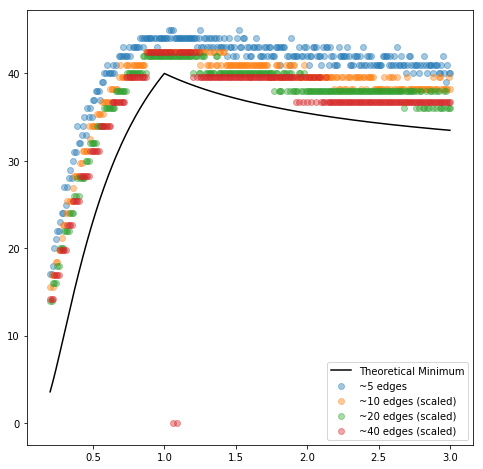

In [787]:
plt.figure(figsize=(8, 8))

allten4k = pd.read_csv('outputs/4000_10bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
ten4k = allten4k[allten4k['long_length'] > 0]

alltwenty4k = pd.read_csv('outputs/4000_20bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
twenty4k = alltwenty4k[alltwenty4k['long_length'] > 0]

allfourty4k = pd.read_csv('outputs/4000_40bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
fourty4k = allfourty4k[allfourty4k['long_lengthBool'] > 0]

plt.scatter(k4['p'], k4['short_lengthBool'], label='~5 edges', alpha=0.4)
plt.scatter(ten4k['p'], np.sqrt(2)*ten4k['short_lengthBool'], label='~10 edges (scaled)', alpha=0.4)
plt.scatter(twenty4k['p'], 2*twenty4k['short_lengthBool'], label='~20 edges (scaled)', alpha=0.4)
plt.scatter(fourty4k['p'], np.sqrt(8)*fourty4k['short_lengthBool'], label='~40 edges (scaled)', alpha=0.4)

theoretical4k = np.concatenate(((2/k4[k4['p'] < 1]['r']), (2**(1/k4[k4['p'] >= 1]['p'])/k4[k4['p'] >= 1]['r'])))
plt.plot(k4['p'], theoretical4k, 'k', label='Theoretical Minimum') 
plt.legend()

In [737]:
a = np.array([[ 0,  1,  2,  3],[ 4,  5,  6,  7],[ 8,  9, 10, 11],[12, 13, 14, 15]])
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

ValueError: setting an array element with a sequence.

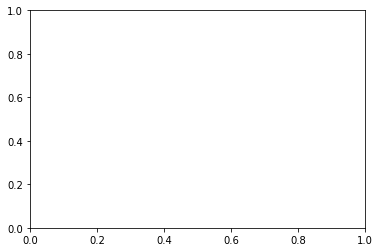

In [776]:
data = np.array(np.sqrt(2)*ten4k['short_lengthBool'])

bins = 20

bin_means = np.histogram(ten4k['p'], bins, weights=data)
plt.plot(bin_means)

In [777]:
bin_means

(array([306.88434303, 415.77878734, 461.03362133, 550.12907576,
        575.58491989, 593.9696962 , 593.9696962 , 589.72705551,
        625.08239457, 533.15851301, 610.94025895, 562.85699782,
        519.01637739, 554.37171645, 547.30064864, 548.7148622 ,
        541.64379439, 538.81536726, 534.57272658, 578.41334701]),
 array([0.2 , 0.34, 0.48, 0.62, 0.76, 0.9 , 1.04, 1.18, 1.32, 1.46, 1.6 ,
        1.74, 1.88, 2.02, 2.16, 2.3 , 2.44, 2.58, 2.72, 2.86, 3.  ]))

In [779]:
np.sum(np.histogram(data, bins)[0])

281

In [781]:
len(data)

281